In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd
import tensorflow as tf
from sklearn.datasets import make_spd_matrix
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline

In [0]:
def multi(n, mu, sig, x):
  '''
  Input: n-dimention, mu-mean, sig-covariance matrix, x-data vector
  returns the probability p(x/c1) distribution of the sample
  '''
  return ((2*np.pi)**(-n/2))*(np.linalg.det(sig)**(-0.5))*(np.exp(-0.5*(x.reshape(3,1) - mu.reshape(3,1)).T@np.linalg.inv(sig)@(x.reshape(3,1) - mu.reshape(3,1))))

In [0]:
def linear_transform(N, n, mean, sigma, pl):
  '''
  Input: N-samples, n-dimension, mu-mean vector, sig-covariance matrix
  returns random samples generated according to priors, mu and sig
  '''
  
  # number = np.zeros(4,) 
  np.random.seed(18)
  
  tempo = np.random.rand(1,N) # generating N random samples
  pl_mod = np.cumsum(pl) # cumulative sum
  pl_mod = np.insert(pl_mod, 0, 0) # pl_mod is now [0 0.1 0.3 0.5 1] and we take ranges between them for the three classes

  x = np.zeros([n,N])
  ls = []

  for i in range(mean.shape[0]):
    if (i != 3):
      number = np.where((tempo >= pl_mod[i]) & (tempo < pl_mod[i+1]))[1]
      x[:,number] = np.random.multivariate_normal(mean[i,:,:].reshape(3,), sigma[i,:,:], len(number)).T
    else:
      number = np.where((tempo >= pl_mod[i]) & (tempo <= pl_mod[i+1]))[1]
      x[:,number] = np.random.multivariate_normal(mean[i,:,:].reshape(3,), sigma[i,:,:], len(number)).T
    ls.append(number)
    
  return (x,ls)

In [0]:
n = 3
N = 10000
pl = np.array([0.14, 0.21, 0.29, 0.36])
mean = np.array([[2, -2, 2], [2, -3, 4], [6, -1, 4], [5, -3, 2]]).reshape(4,3,1)
one = np.expand_dims(make_spd_matrix(3, 3), axis = 0)
two = np.expand_dims(make_spd_matrix(3, 2), axis = 0)
three = np.expand_dims(make_spd_matrix(3, 31), axis = 0)
four = np.expand_dims(make_spd_matrix(3, 21), axis = 0)
covVecs = np.concatenate((one, two, three, four), axis = 0)

In [0]:
data, cnt = linear_transform(N, n, mean, covVecs, pl)

In [0]:
ytest = np.zeros(10000)
ytest[cnt[0]] = 0
ytest[cnt[1]] = 1
ytest[cnt[2]] = 2
ytest[cnt[3]] = 3

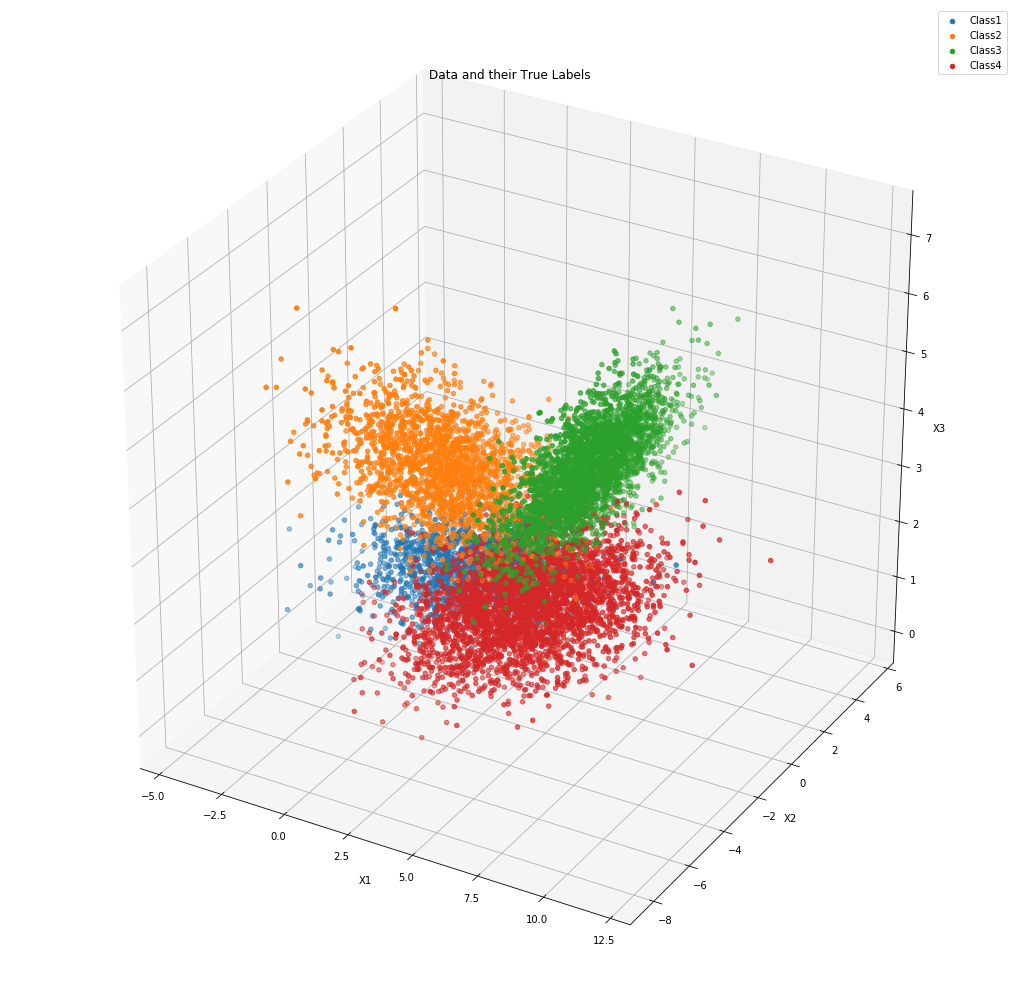

In [0]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0,cnt[0]], data[1,cnt[0]], data[2,cnt[0]])
ax.scatter(data[0,cnt[1]], data[1,cnt[1]], data[2,cnt[1]])
ax.scatter(data[0,cnt[2]], data[1,cnt[2]], data[2,cnt[2]])
ax.scatter(data[0,cnt[3]], data[1,cnt[3]], data[2,cnt[3]])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Data and their True Labels')
ax.legend(('Class1', 'Class2', 'Class3', 'Class4'))

In [0]:
# define empty arrays for storing the probabilities
p11 = np.zeros(len(cnt[0]))
p21 = np.zeros(len(cnt[0]))
p31 = np.zeros(len(cnt[0]))
p41 = np.zeros(len(cnt[0]))
p12 = np.zeros(len(cnt[1]))
p22 = np.zeros(len(cnt[1]))
p32 = np.zeros(len(cnt[1]))
p42 = np.zeros(len(cnt[1]))
p13 = np.zeros(len(cnt[2]))
p23 = np.zeros(len(cnt[2]))
p33 = np.zeros(len(cnt[2]))
p43 = np.zeros(len(cnt[2]))
p14 = np.zeros(len(cnt[3]))
p24 = np.zeros(len(cnt[3]))
p34 = np.zeros(len(cnt[3]))
p44 = np.zeros(len(cnt[3]))

class1 = data[:,cnt[0]]
class2 = data[:,cnt[1]]
class3 = data[:,cnt[2]]
class4 = data[:,cnt[3]]
# pij corressponds to: data with true label j being passed through ith classifier
for i in range(len(cnt[0])):
  p11[i] = multi(n, mean[0,:,:], covVecs[0,:,:], class1[:,i])
  p21[i] = multi(n, mean[1,:,:], covVecs[1,:,:], class1[:,i])
  p31[i] = multi(n, mean[2,:,:], covVecs[2,:,:], class1[:,i])
  p41[i] = multi(n, mean[3,:,:], covVecs[3,:,:], class1[:,i])

for i in range(len(cnt[1])):
  p12[i] = multi(n, mean[0,:,:], covVecs[0,:,:], class2[:,i])
  p22[i] = multi(n, mean[1,:,:], covVecs[1,:,:], class2[:,i])
  p32[i] = multi(n, mean[2,:,:], covVecs[2,:,:], class2[:,i])
  p42[i] = multi(n, mean[3,:,:], covVecs[3,:,:], class2[:,i])

for i in range(len(cnt[2])):
  p13[i] = multi(n, mean[0,:,:], covVecs[0,:,:], class3[:,i])
  p23[i] = multi(n, mean[1,:,:], covVecs[1,:,:], class3[:,i])
  p33[i] = multi(n, mean[2,:,:], covVecs[2,:,:], class3[:,i])
  p43[i] = multi(n, mean[3,:,:], covVecs[3,:,:], class3[:,i])

for i in range(len(cnt[3])):
  p14[i] = multi(n, mean[0,:,:], covVecs[0,:,:], class4[:,i])
  p24[i] = multi(n, mean[1,:,:], covVecs[1,:,:], class4[:,i])
  p34[i] = multi(n, mean[2,:,:], covVecs[2,:,:], class4[:,i])
  p44[i] = multi(n, mean[3,:,:], covVecs[3,:,:], class4[:,i])


In [0]:
p11 = p11*pl[0]
p21 = p21*pl[1]
p31 = p31*pl[2]
p41 = p41*pl[3]
p12 = p12*pl[0]
p22 = p22*pl[1]
p32 = p32*pl[2]
p42 = p42*pl[3]
p13 = p13*pl[0]
p23 = p23*pl[1]
p33 = p33*pl[2]
p34 = p34*pl[3]
p14 = p14*pl[0] 
p24 = p24*pl[1]
p34 = p34*pl[2]
p44 = p44*pl[3]

In [0]:
c11 = np.where((p11 > p21) & (p11 > p31) & (p11 > p41))
c21 = np.where((p21 > p11) & (p21 > p31) & (p21 > p41))
c31 = np.where((p31 > p11) & (p31 > p21) & (p31 > p41))
c41 = np.where((p41 > p11) & (p41 > p21) & (p41 > p31))

c12 = np.where((p12 > p22) & (p12 > p32) & (p12 > p42))
c22 = np.where((p22 > p12) & (p22 > p32) & (p22 > p42))
c32 = np.where((p32 > p22) & (p32 > p12) & (p32 > p42))
c42 = np.where((p42 > p12) & (p42 > p22) & (p42 > p32))

c13 = np.where((p13 > p23) & (p13 > p33) & (p13 > p43))
c23 = np.where((p23 > p33) & (p23 > p13) & (p23 > p43))
c33 = np.where((p33 > p13) & (p33 > p23) & (p33 > p43))
c43 = np.where((p43 > p13) & (p43 > p23) & (p43 > p33))

c14 = np.where((p14 > p24) & (p14 > p34) & (p14 > p44))
c24 = np.where((p24 > p14) & (p24 > p34) & (p24 > p44))
c34 = np.where((p34 > p14) & (p34 > p24) & (p34 > p44))
c44 = np.where((p44 > p14) & (p44 > p24) & (p44 > p34))

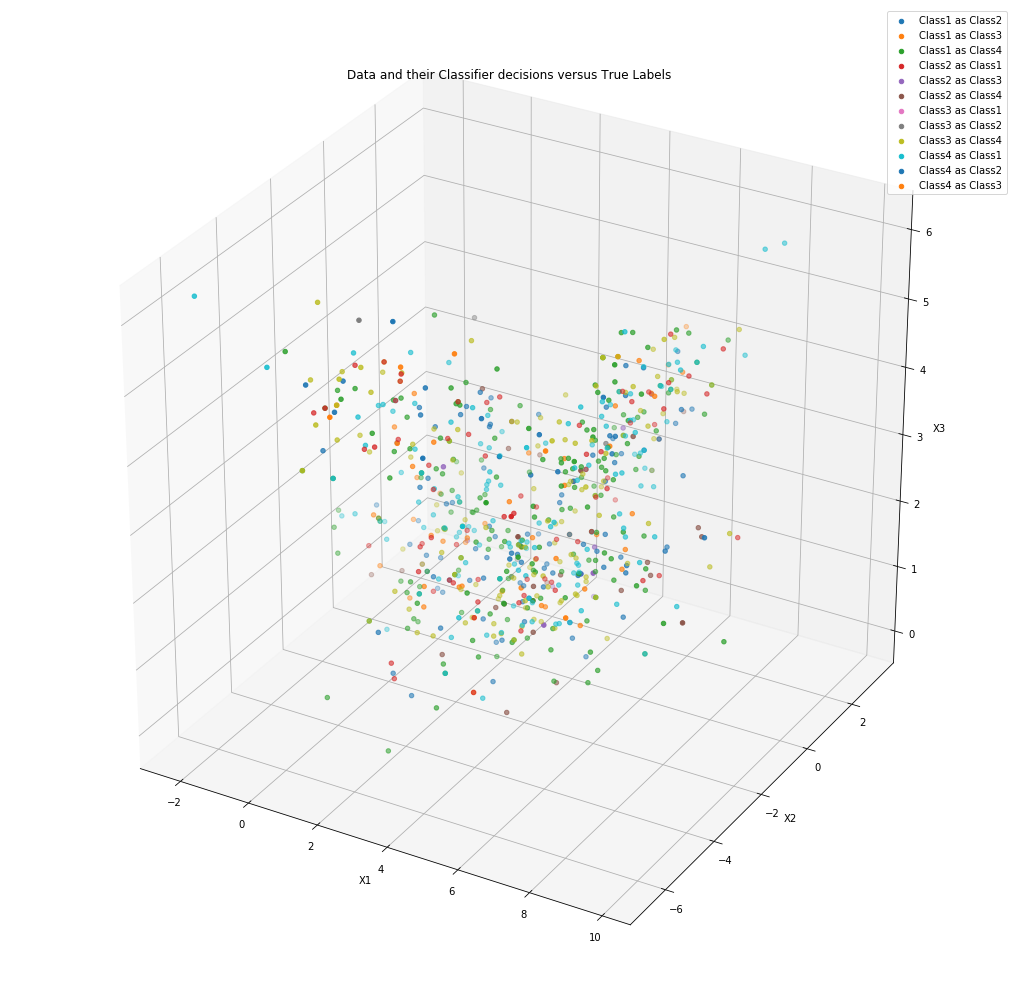

In [0]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')
# True data
# ax.scatter(data[0,cnt[0]], data[1,cnt[0]], data[2,cnt[0]])
# ax.scatter(data[0,cnt[1]], data[1,cnt[1]], data[2,cnt[1]])
# ax.scatter(data[0,cnt[2]], data[1,cnt[2]], data[2,cnt[2]])
# ax.scatter(data[0,cnt[3]], data[1,cnt[3]], data[2,cnt[3]])
# 
ax.scatter(data[0,c21], data[1,c21], data[2,c21])
ax.scatter(data[0,c31], data[1,c31], data[2,c31])
ax.scatter(data[0,c41], data[1,c41], data[2,c41])

ax.scatter(data[0,c12], data[1,c12], data[2,c12])
ax.scatter(data[0,c32], data[1,c32], data[2,c32])
ax.scatter(data[0,c42], data[1,c42], data[2,c42])

ax.scatter(data[0,c13], data[1,c13], data[2,c13])
ax.scatter(data[0,c23], data[1,c23], data[2,c23])
ax.scatter(data[0,c43], data[1,c43], data[2,c43])

ax.scatter(data[0,c14], data[1,c14], data[2,c14])
ax.scatter(data[0,c24], data[1,c24], data[2,c24])
ax.scatter(data[0,c34], data[1,c34], data[2,c34])

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Data and their Classifier decisions versus True Labels')
ax.legend(('Class1 as Class2', 'Class1 as Class3', 'Class1 as Class4', 'Class2 as Class1', 'Class2 as Class3', 'Class2 as Class4', 'Class3 as Class1', 'Class3 as Class2', 'Class3 as Class4', 'Class4 as Class1', 'Class4 as Class2', 'Class4 as Class3'))

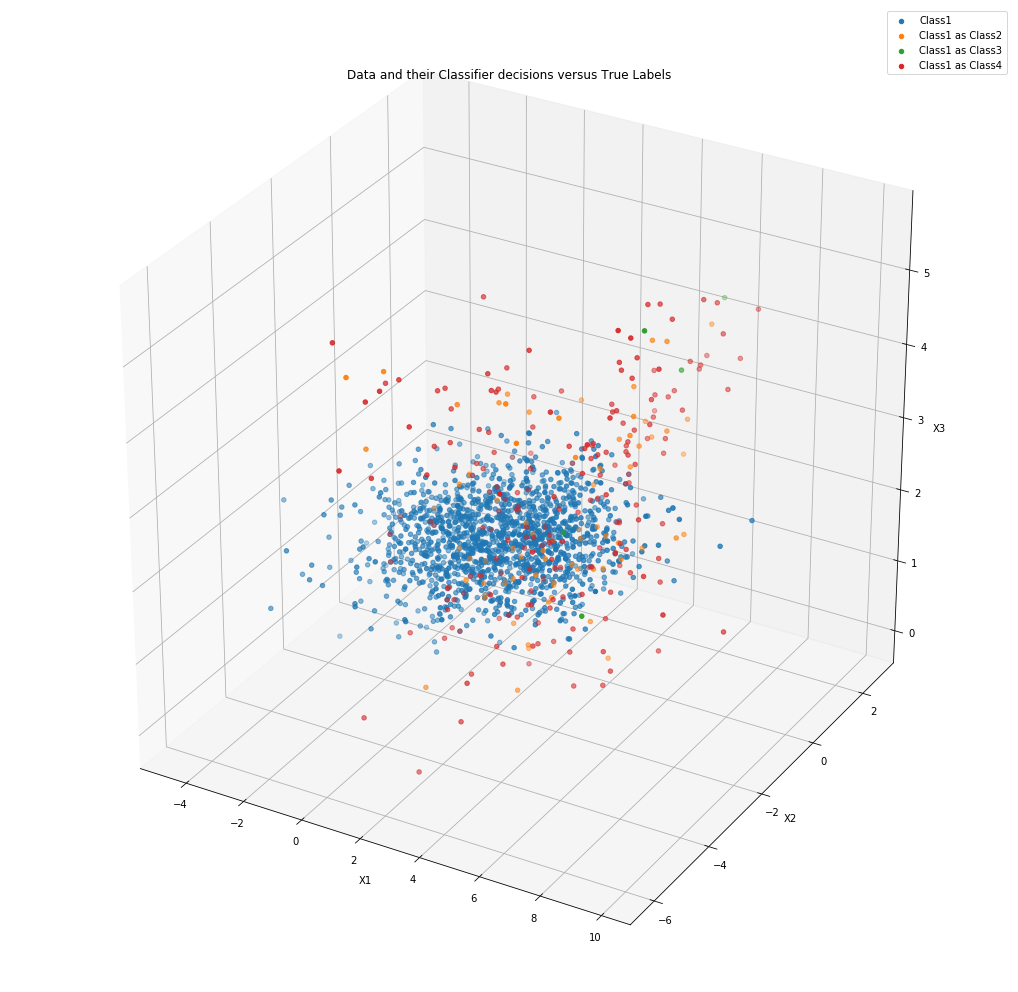

In [0]:

fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')
# True data
ax.scatter(data[0,cnt[0]], data[1,cnt[0]], data[2,cnt[0]])
 
ax.scatter(data[0,c21], data[1,c21], data[2,c21])
ax.scatter(data[0,c31], data[1,c31], data[2,c31])
ax.scatter(data[0,c41], data[1,c41], data[2,c41])

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Data and their Classifier decisions versus True Labels')
ax.legend(('Class1', 'Class1 as Class2', 'Class1 as Class3', 'Class1 as Class4'))

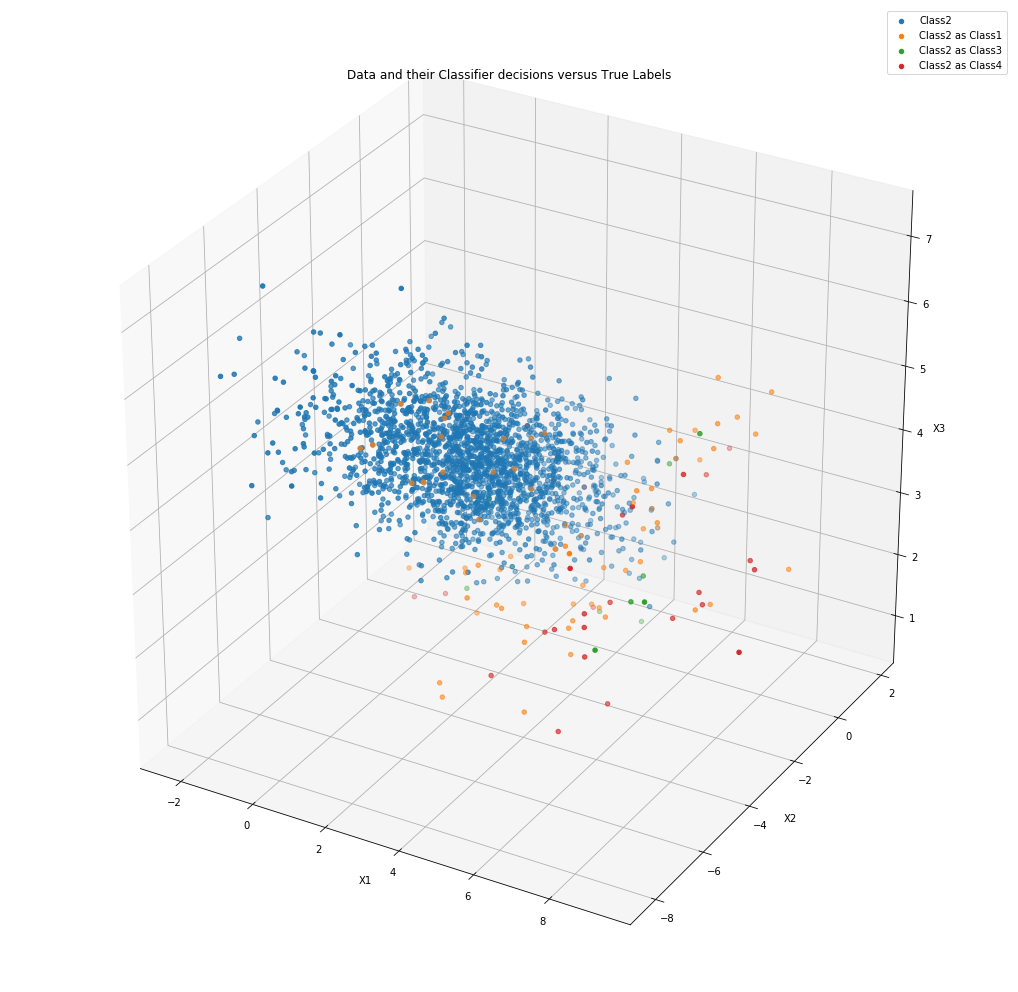

In [0]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')
# True data
ax.scatter(data[0,cnt[1]], data[1,cnt[1]], data[2,cnt[1]])

ax.scatter(data[0,c12], data[1,c12], data[2,c12])
ax.scatter(data[0,c32], data[1,c32], data[2,c32])
ax.scatter(data[0,c42], data[1,c42], data[2,c42])

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Data and their Classifier decisions versus True Labels')
ax.legend(('Class2', 'Class2 as Class1', 'Class2 as Class3', 'Class2 as Class4'))

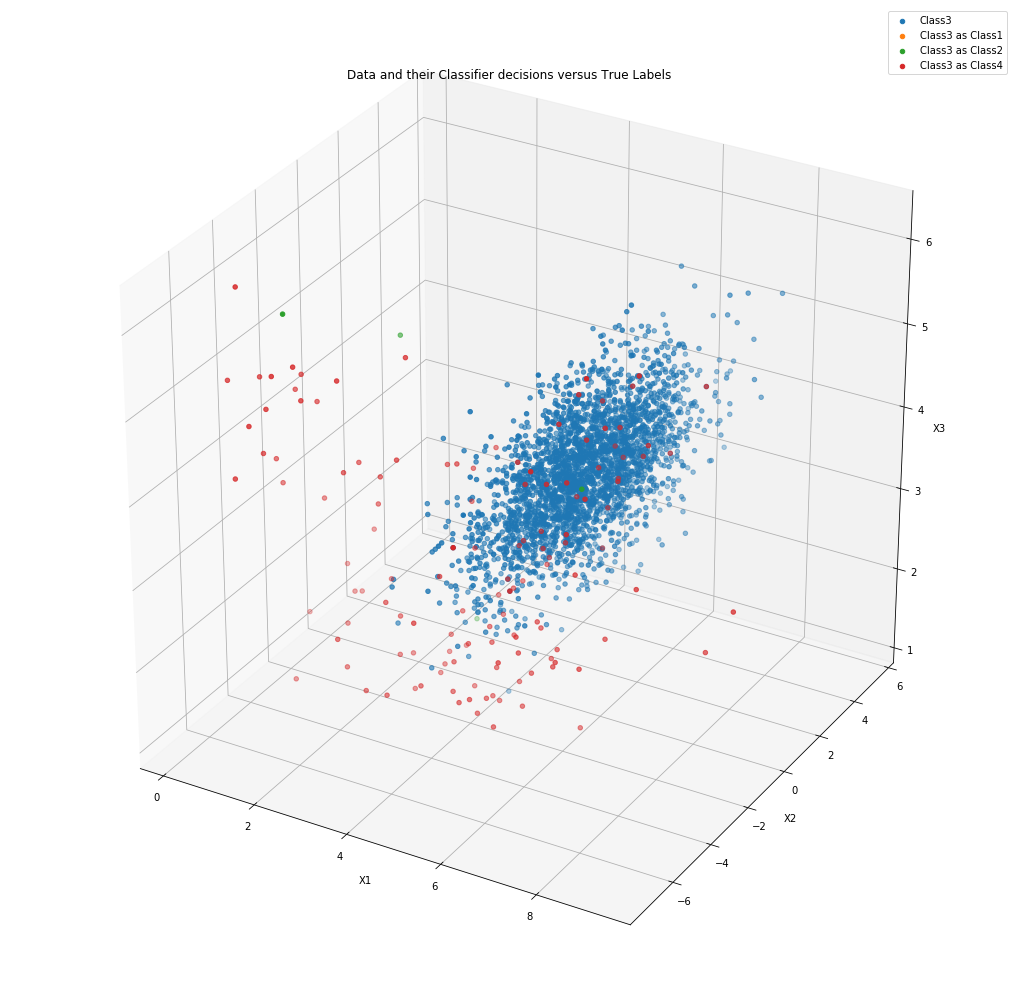

In [0]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')
# True data
ax.scatter(data[0,cnt[2]], data[1,cnt[2]], data[2,cnt[2]])

ax.scatter(data[0,c13], data[1,c13], data[2,c13])
ax.scatter(data[0,c23], data[1,c23], data[2,c23])
ax.scatter(data[0,c43], data[1,c43], data[2,c43])

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Data and their Classifier decisions versus True Labels')
ax.legend(('Class3', 'Class3 as Class1', 'Class3 as Class2', 'Class3 as Class4'))

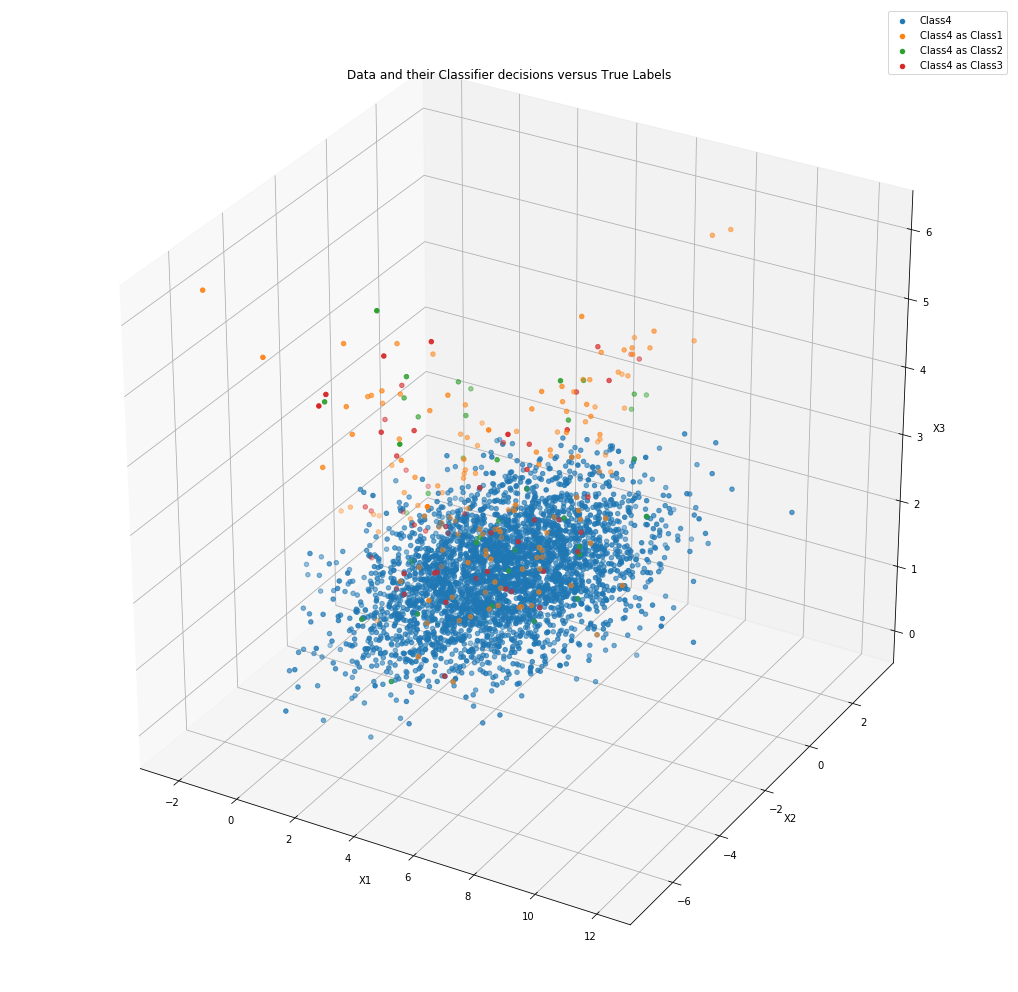

In [0]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[0,cnt[3]], data[1,cnt[3]], data[2,cnt[3]])
 
ax.scatter(data[0,c14], data[1,c14], data[2,c14])
ax.scatter(data[0,c24], data[1,c24], data[2,c24])
ax.scatter(data[0,c34], data[1,c34], data[2,c34])

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Data and their Classifier decisions versus True Labels')
ax.legend(('Class4', 'Class4 as Class1', 'Class4 as Class2', 'Class4 as Class3'))

In [0]:
confusion = np.array([[c11[0].shape[0], c21[0].shape[0], c31[0].shape[0], c41[0].shape[0]], [c12[0].shape[0], c22[0].shape[0], c32[0].shape[0], c42[0].shape[0]], [c13[0].shape[0], c23[0].shape[0], c33[0].shape[0], c43[0].shape[0]], [c14[0].shape[0], c24[0].shape[0], c34[0].shape[0], c44[0].shape[0]]])
print(confusion)

[[1197   73    5  199]
 [  72 1966   11   29]
 [   0    4 2783  131]
 [ 140   37   51 3302]]


In [0]:
tot_error = c12[0].shape[0]+c13[0].shape[0]+c14[0].shape[0]+c21[0].shape[0]+c23[0].shape[0]+c24[0].shape[0]+c31[0].shape[0]+c32[0].shape[0]+c34[0].shape[0]+c41[0].shape[0]+c42[0].shape[0]+c43[0].shape[0]
print('Total Number of points Missclassified: {}'.format(tot_error))
print('Error: {}'.format(tot_error/10000))

Total Number of points Missclassified: 752
Error: 0.0752


####Using NN

#####Dataset 100

In [0]:
data_100, cnt_100 = linear_transform(100, n, mean, covVecs, pl)

In [0]:
ydat_100 = np.zeros(100)
ydat_100[cnt_100[0]] = 0
ydat_100[cnt_100[1]] = 1
ydat_100[cnt_100[2]] = 2
ydat_100[cnt_100[3]] = 3
ydat_cat_100 = tf.keras.utils.to_categorical(ydat_100).T

In [0]:
N = 100
k = 10
main_ls_100 = []
for nodes in range(5,51,5):
  ls = []
  model_100 = tf.keras.models.Sequential([
              tf.keras.layers.Input(shape=(3,)),
              tf.keras.layers.Dense(nodes, activation = 'softplus'),
              tf.keras.layers.Dense(4, activation = 'softmax')
      ])
  model_100.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  for fold in range(k):
    val_data = data_100[:,fold*(N//k):(fold+1)*(N//k)] # split data into val and train
    y_val = ydat_cat_100[:,fold*(N//k):(fold+1)*(N//k)]
    train_data = np.concatenate((data_100[:,:fold*(N//k)], data_100[:,(fold+1)*(N//k):]), axis = 1)
    y_train = np.concatenate((ydat_cat_100[:,:fold*(N//k)], ydat_cat_100[:,(fold+1)*(N//k):]), axis = 1)

    model_100.fit(train_data.T, y_train.T, epochs=200, batch_size = 100, verbose = 0)
    tw = np.argmax(model_100.predict(val_data.T), axis = 1)
    print('Done with {} folds'.format(fold+1))
  print('Done with {} nodes'.format(nodes))
  cnt = 0
  for i in tw:
    if (tw[i] != ydat_100[i]):
      cnt += 1;
  # ls.append(cnt)
  main_ls_100.append(cnt)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Done with 1 folds
Done with 2 folds
Done with 3 folds
Done with 4 folds
Done with 5 folds
Done with 6 folds
Done with 7 folds
Done with 8 folds
Done with 9 folds
Done with 10 folds
Done with 5 nodes
Done with 1 folds
Done with 2 folds
Done with 3 folds
Done with 4 folds
Done with 5 folds
Done with 6 folds
Done with 7 folds
Done with 8 folds
Done with 9 folds
Done with 10 folds
Done with 10 nodes
Done with 1 folds
Done with 2 folds
Done with 3 folds
Done with 4 folds
Done with 5 folds
Done with 6 folds
Done with 7 folds
Done with 8 folds
Done with 9 folds
Done with 10 folds
Done with 15 nodes
Done with 1 folds
Done with 2 folds
Done with 3 folds
Done with 4 folds
Done with 5 folds
Done with 6 folds
Done with 7 folds
Done with 8 folds
Done with 9 folds
Done with 10 folds
Done with 20 nodes
Done with 1 folds
Done with 2 folds
Done with 3 folds
Done with 4 folds
Done with 5 folds
Done with 6 folds
Done with 7 

In [0]:
best_nodes_100 = (np.argmax(1-np.array(main_ls_100)/100)+1)*5
best_nodes_100

5

Text(0.5, 1.0, '10 Fold Cross-validation for number of neurons')

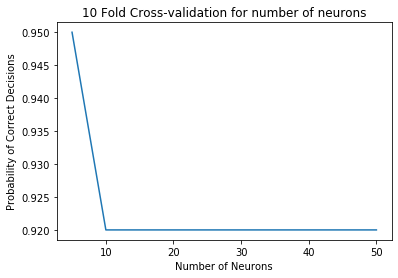

In [0]:
plt.plot([5,10,15,20,25,30,35,40,45,50], 1-np.array(main_ls_100)/100)
plt.xlabel('Number of Neurons')
plt.ylabel('Probability of Correct Decisions')
plt.title('10 Fold Cross-validation for number of neurons')

In [0]:
main_ls_100

[5, 8, 8, 8, 8, 8, 8, 8, 8, 8]

In [0]:
model_100_final = tf.keras.models.Sequential([
              tf.keras.layers.Input(shape=(3,)),
              tf.keras.layers.Dense(best_nodes_100, activation = 'softplus'),
              tf.keras.layers.Dense(4, activation = 'softmax')
      ])
model_100_final.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_100_final.fit(data_100.T, ydat_cat_100.T, epochs=200, batch_size = 100, verbose = 0)

In [0]:
model_100_final.save_weights('weightd_100.h5')

#####Dataset 1000

In [0]:
data_1000, cnt_1000 = linear_transform(1000, n, mean, covVecs, pl)

In [0]:
ydat_1000 = np.zeros(1000)
ydat_1000[cnt_1000[0]] = 0
ydat_1000[cnt_1000[1]] = 1
ydat_1000[cnt_1000[2]] = 2
ydat_1000[cnt_1000[3]] = 3
ydat_cat_1000 = tf.keras.utils.to_categorical(ydat_1000).T

In [0]:
N = 1000
k = 10
main_ls_1000 = []
for nodes in range(5,51,5):
  ls = []
  model_1000 = tf.keras.models.Sequential([
              tf.keras.layers.Input(shape=(3,)),
              tf.keras.layers.Dense(nodes, activation = 'softplus'),
              tf.keras.layers.Dense(4, activation = 'softmax')
      ])
  model_1000.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  for fold in range(k):
    val_data = data_1000[:,fold*(N//k):(fold+1)*(N//k)] # split data into val and train
    y_val = ydat_cat_1000[:,fold*(N//k):(fold+1)*(N//k)]
    train_data = np.concatenate((data_1000[:,:fold*(N//k)], data_1000[:,(fold+1)*(N//k):]), axis = 1)
    y_train = np.concatenate((ydat_cat_1000[:,:fold*(N//k)], ydat_cat_1000[:,(fold+1)*(N//k):]), axis = 1)

    model_1000.fit(train_data.T, y_train.T, epochs=200, batch_size = 100, verbose = 0)
    tw = np.argmax(model_1000.predict(val_data.T), axis = 1)
    print('Done with {} folds'.format(fold+1))
  print('Done with {} nodes'.format(nodes))
  cnt = 0
  for i in tw:
    if (tw[i] != ydat_1000[i]):
      cnt += 1;
  # ls.append(cnt)
  main_ls_1000.append(cnt)

Done with 1 folds
Done with 2 folds
Done with 3 folds
Done with 4 folds
Done with 5 folds
Done with 6 folds
Done with 7 folds
Done with 8 folds
Done with 9 folds
Done with 10 folds
Done with 5 nodes
Done with 1 folds
Done with 2 folds
Done with 3 folds
Done with 4 folds
Done with 5 folds
Done with 6 folds
Done with 7 folds
Done with 8 folds
Done with 9 folds
Done with 10 folds
Done with 10 nodes
Done with 1 folds
Done with 2 folds
Done with 3 folds
Done with 4 folds
Done with 5 folds
Done with 6 folds
Done with 7 folds
Done with 8 folds
Done with 9 folds
Done with 10 folds
Done with 15 nodes
Done with 1 folds
Done with 2 folds
Done with 3 folds
Done with 4 folds
Done with 5 folds
Done with 6 folds
Done with 7 folds
Done with 8 folds
Done with 9 folds
Done with 10 folds
Done with 20 nodes
Done with 1 folds
Done with 2 folds
Done with 3 folds
Done with 4 folds
Done with 5 folds
Done with 6 folds
Done with 7 folds
Done with 8 folds
Done with 9 folds
Done with 10 folds
Done with 25 nodes
D

In [0]:
best_nodes_1000 = (np.argmax(1-np.array(main_ls_1000)/1000)+1)*5
best_nodes_1000

5

Text(0.5, 1.0, '10 Fold Cross-validation for number of neurons')

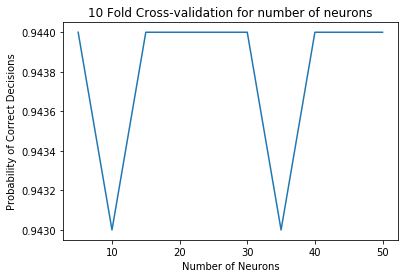

In [0]:
plt.plot([5,10,15,20,25,30,35,40,45,50], 1-np.array(main_ls_1000)/1000)
plt.xlabel('Number of Neurons')
plt.ylabel('Probability of Correct Decisions')
plt.title('10 Fold Cross-validation for number of neurons')

In [0]:
main_ls_1000

[56, 57, 56, 56, 56, 56, 57, 56, 56, 56]

In [0]:
model_1000_final = tf.keras.models.Sequential([
              tf.keras.layers.Input(shape=(3,)),
              tf.keras.layers.Dense(best_nodes_1000, activation = 'softplus'),
              tf.keras.layers.Dense(4, activation = 'softmax')
      ])
model_1000_final.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_1000_final.fit(data_1000.T, ydat_cat_1000.T, epochs=200, batch_size = 100, verbose = 0)

In [0]:
model_1000_final.save_weights('weightd_1000.h5')

#####Dataset 10000

In [0]:
data_10000, cnt_10000 = linear_transform(10000, n, mean, covVecs, pl)

In [0]:
ydat_10000 = np.zeros(10000)
ydat_10000[cnt_10000[0]] = 0
ydat_10000[cnt_10000[1]] = 1
ydat_10000[cnt_10000[2]] = 2
ydat_10000[cnt_10000[3]] = 3
ydat_cat_10000 = tf.keras.utils.to_categorical(ydat_10000).T

In [0]:
N = 10000
k = 10
main_ls_10000 = []
for nodes in range(5,51,5):
  ls = []
  model_10000 = tf.keras.models.Sequential([
              tf.keras.layers.Input(shape=(3,)),
              tf.keras.layers.Dense(nodes, activation = 'softplus'),
              tf.keras.layers.Dense(4, activation = 'softmax')
      ])
  model_10000.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  for fold in range(k):
    val_data = data_10000[:,fold*(N//k):(fold+1)*(N//k)] # split data into val and train
    y_val = ydat_cat_10000[:,fold*(N//k):(fold+1)*(N//k)]
    train_data = np.concatenate((data_10000[:,:fold*(N//k)], data_10000[:,(fold+1)*(N//k):]), axis = 1)
    y_train = np.concatenate((ydat_cat_10000[:,:fold*(N//k)], ydat_cat_10000[:,(fold+1)*(N//k):]), axis = 1)

    model_10000.fit(train_data.T, y_train.T, epochs=200, batch_size = 100, verbose = 0)
    tw = np.argmax(model_10000.predict(val_data.T), axis = 1)
    print('Done with {} folds'.format(fold+1))
  print('Done with {} nodes'.format(nodes))
  cnt = 0
  for i in tw:
    if (tw[i] != ydat_10000[i]):
      cnt += 1;
  # ls.append(cnt)
  main_ls_10000.append(cnt)

Done with 1 folds
Done with 2 folds
Done with 3 folds
Done with 4 folds
Done with 5 folds
Done with 6 folds
Done with 7 folds
Done with 8 folds
Done with 9 folds
Done with 10 folds
Done with 5 nodes
Done with 1 folds
Done with 2 folds
Done with 3 folds
Done with 4 folds
Done with 5 folds
Done with 6 folds
Done with 7 folds
Done with 8 folds
Done with 9 folds
Done with 10 folds
Done with 10 nodes
Done with 1 folds
Done with 2 folds
Done with 3 folds
Done with 4 folds
Done with 5 folds
Done with 6 folds
Done with 7 folds
Done with 8 folds
Done with 9 folds
Done with 10 folds
Done with 15 nodes
Done with 1 folds
Done with 2 folds
Done with 3 folds
Done with 4 folds
Done with 5 folds
Done with 6 folds
Done with 7 folds
Done with 8 folds
Done with 9 folds
Done with 10 folds
Done with 20 nodes
Done with 1 folds
Done with 2 folds
Done with 3 folds
Done with 4 folds
Done with 5 folds
Done with 6 folds
Done with 7 folds
Done with 8 folds
Done with 9 folds
Done with 10 folds
Done with 25 nodes
D

In [0]:
best_nodes_10000 = (np.argmax(1-np.array(main_ls_10000)/10000)+1)*5
best_nodes_10000

20

Text(0.5, 1.0, '10 Fold Cross-validation for number of neurons')

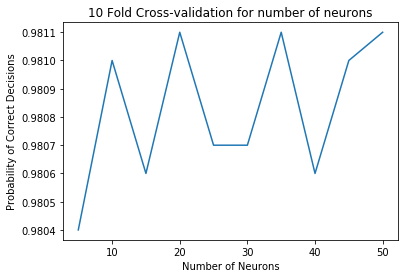

In [0]:
plt.plot([5,10,15,20,25,30,35,40,45,50], 1-np.array(main_ls_10000)/10000)
plt.xlabel('Number of Neurons')
plt.ylabel('Probability of Correct Decisions')
plt.title('10 Fold Cross-validation for number of neurons')

In [0]:
main_ls_10000

[196, 190, 194, 189, 193, 193, 189, 194, 190, 189]

In [0]:
model_10000_final = tf.keras.models.Sequential([
              tf.keras.layers.Input(shape=(3,)),
              tf.keras.layers.Dense(best_nodes_10000, activation = 'softplus'),
              tf.keras.layers.Dense(4, activation = 'softmax')
      ])
model_10000_final.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_10000_final.fit(data_10000.T, ydat_cat_10000.T, epochs=200, batch_size = 100, verbose = 0)

In [0]:
model_10000_final.save_weights('weightd_10000.h5')

#####Test 100

In [0]:
test_100 = np.argmax(model_100_final.predict(data.T), axis = 1)

In [0]:
cnt = 0
for i in range(10000):
  if (test_100[i] != ytest[i]):
    cnt += 1

print('Number of Missclassifications: {}'.format(cnt))

Number of Missclassifications: 6500


#####Test 1000

In [0]:
test_1000 = np.argmax(model_1000_final.predict(data.T), axis = 1)

In [0]:
cnt = 0
for i in range(10000):
  if (test_1000[i] != ytest[i]):
    cnt += 1

print('Number of Missclassifications: {}'.format(cnt))

Number of Missclassifications: 1479


#####Test 10000

In [0]:
test_10000 = np.argmax(model_10000_final.predict(data.T), axis = 1)

In [0]:
cnt = 0
for i in range(10000):
  if (test_10000[i] != ytest[i]):
    cnt += 1

print('Number of Missclassifications: {}'.format(cnt))

Number of Missclassifications: 747
